# Data Analysis

## Libary importation

In [2]:
# Traitement de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_csv("X_train_NHkHMNU.csv")
y = pd.read_csv("y_train_ZAN5mwg.csv")

# Merge both datasets
df = pd.concat([X, y], axis=1)

# Drop the second-to-last column if needed
df = df.drop(df.columns[-2], axis=1)
df = df.sort_values("DAY_ID")

## Univariate Data Analysis

The aim of this part is to study the behavior the each variable independently to better understand its distribution, features, quality...

For this analysis, we will study the df_french and german separatly to better understand and show the differences between the two countries. We will further show, how we are able to explain the behavior of some variables df_from real life conditions.

**A FAIRE**

Vérifié la qualité et le comportement de chaques variables, faire analyse pour les deux df et comparer les différences (distributions, statistiques etc) montrer les différences de comportement des variables propres à chaques pays (la colonne nucléaire_df_fr différentes distribution que nucléaire_de), c'est très important d'appuyer les différences de comportement et pourquoi pas justifier ça, grâce à des informations extérieures (par exemple que le prix de l'électricité df_français est moins volatile car repose sur le nucléaire qui est stable)

### Study of the target variable `TARGET`

In [14]:
#Descriptive statistics
print("Target variable's description : \n", df['TARGET'].describe(), "\n")

Target variable's description : 
 count    1494.000000
mean        0.089934
std         1.034582
min        -6.519268
25%        -0.219861
50%         0.000000
75%         0.269719
max         7.786578
Name: TARGET, dtype: float64 



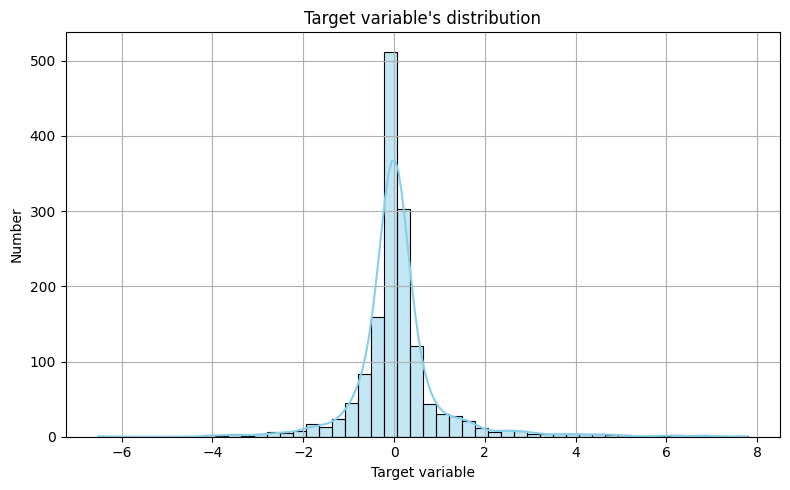

In [15]:
# Histogram distribution

plt.figure(figsize=(8, 5))
sns.histplot(df["TARGET"], bins=50, kde=True, color="skyblue")
plt.title("Target variable's distribution")
plt.xlabel("Target variable")
plt.ylabel("Number")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

The target variable is centered around 0. Its distribution looks like a gaussian distribution.

Let's study the difference between the price variation (target variable) of the french and german price :

In [17]:
# define two different datasets
df_fr = df[df["COUNTRY"] == "FR"]
df_de = df[df["COUNTRY"] == "DE"]

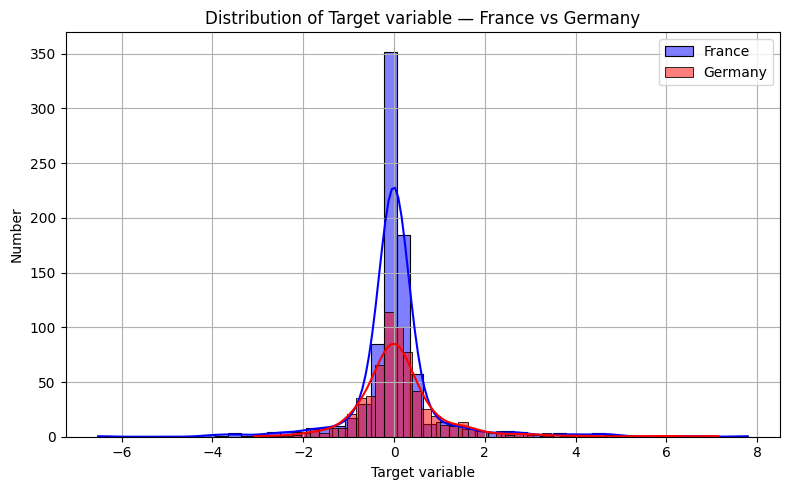

In [18]:
# Histogram distribution
plt.figure(figsize=(8, 5))

sns.histplot(df_fr["TARGET"], bins=50, kde=True, color="blue", label="France", alpha=0.5)
sns.histplot(df_de["TARGET"], bins=50, kde=True, color="red", label="Germany", alpha=0.5)

plt.title("Distribution of Target variable — France vs Germany")
plt.xlabel("Target variable")
plt.ylabel("Number")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's study the standardised representation (the dataset don't have the same number of samples).

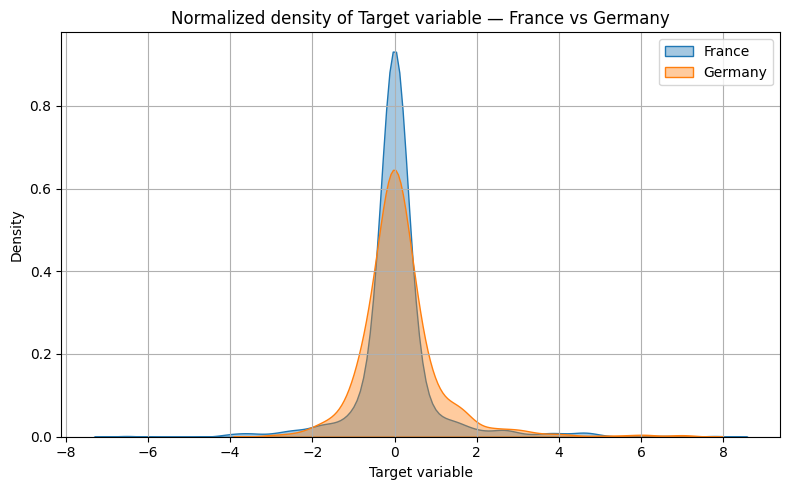

In [19]:
plt.figure(figsize=(8, 5))

sns.kdeplot(df_fr["TARGET"], label="France", fill=True, alpha=0.4)
sns.kdeplot(df_de["TARGET"], label="Germany", fill=True, alpha=0.4)

plt.title("Normalized density of Target variable — France vs Germany")
plt.xlabel("Target variable")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


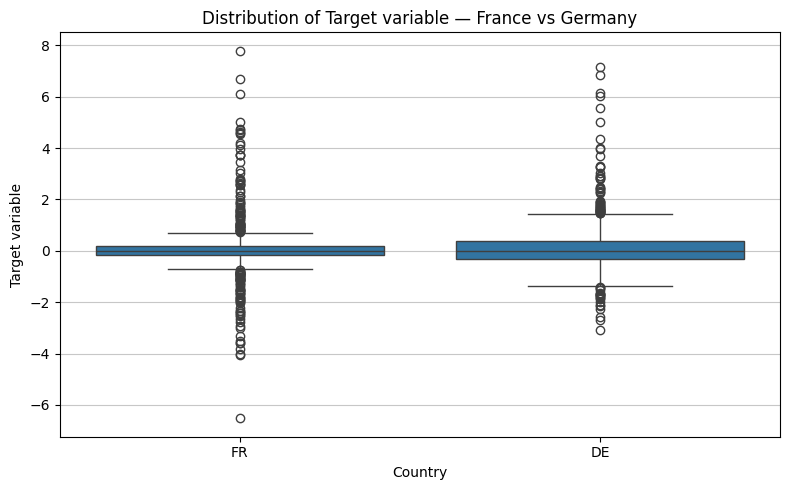

In [22]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df[df["COUNTRY"].isin(["FR", "DE"])],
    x="COUNTRY",
    y="TARGET"
)

plt.title("Distribution of Target variable — France vs Germany")
plt.xlabel("Country")
plt.ylabel("Target variable")
plt.grid(True, axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


**Observations**

We can note some differencies between the 2 datasets

France = closer to 0 not really spread far from 0 => may be more difficult to explain

Germany = more spread data

That is why in the next step we will study the differencies between the french and german data

### Study of the difference between France's and Germany's data

In [4]:
df

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
742,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,-0.650577,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1211,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
1468,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
1408,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
680,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,7.138604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474
986,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,0.789824,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320
1465,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,0.147587
873,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,0.069222,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805,-3.003988


Let's take a look at one specific day :

In [5]:
df[df["DAY_ID"] == 2]

,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
1468,2,DE,-0.068972,-0.66739,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.3446,-0.372156,-0.623041,-0.926064,-0.14895,0.641235,1.80255,1.14092,0.900434,0.861270
1408,2,FR,-0.068972,-0.66739,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,...,-0.3446,-0.372156,-0.623041,-0.926064,-0.14895,0.641235,1.80255,1.14092,0.900434,2.575976


For a same given day (same day `DAY_ID`), the dataset gives the target variable for both df_france and Germany, meaning that there are two rows : one for each country. We can note that those twos rows have the exact same features' value (except for the country and the target variable).
For example, we can observe that for `DAY_ID`=2.

So the features' value are duplicated into two rows when they have the same `DAY_ID`. Thus, we can make the following hypothesis : 
If there are duplications for each day (one df_france, one Germany), we don't have to do two different univariate data analyses, one for each dataset as they would be the same.

Let's check that statement :

In [6]:
df_fr = df[df["COUNTRY"] == "FR"].sort_values("DAY_ID")
df_de = df[df["COUNTRY"] == "DE"].sort_values("DAY_ID")

In [7]:
print("Number of days for df_french's dataset : ", len(df_fr))
print("Number of days for German's dataset : ", len(df_de))

Number of days for df_french's dataset :  851
Number of days for German's dataset :  643


We can see that the french dataset is much larger than the german one. Thus it means there are singletons, and not only duplications. Thus we have to do two separate study for the french and german datasets.

**Conclusion, going forward with the analysis and models, we will separate the dataset into two based on the country**

### df_french dataset Analysis

As we separated the dataset into two different datasets for each country, we don't need the `COUNTRY`variable anymore. We can drop this feature :

In [10]:
df_fr.drop(columns=["COUNTRY"], inplace=True)

#### Study of the missing values

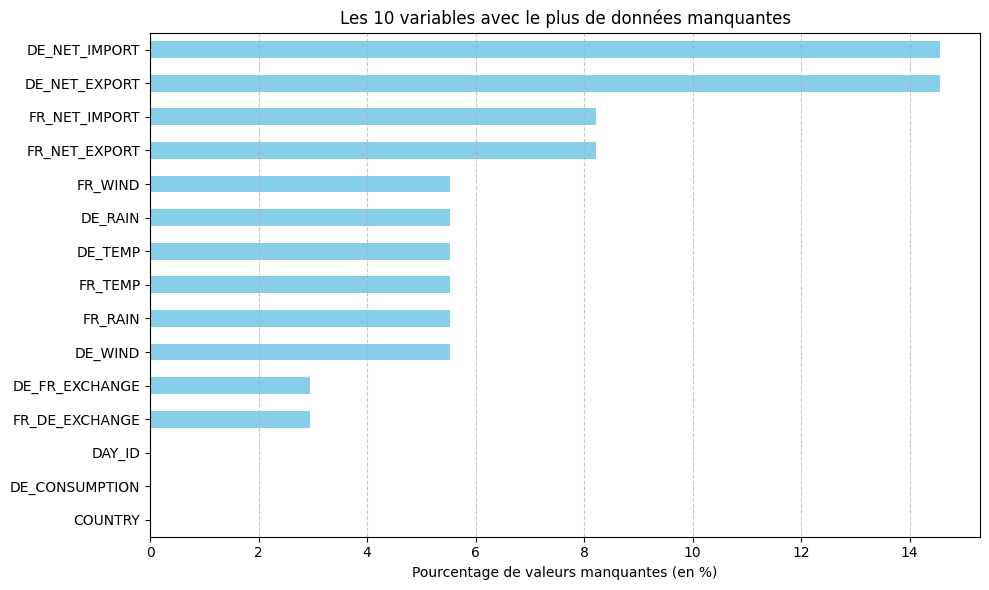

In [8]:
# percentage of missing values per column
missing_values = df_fr.isnull().mean() * 100

# top 10 of columns with the most missing values
top_15_colonnes = missing_values.sort_values(ascending=False).head(15)

# Horizontal barplot
plt.figure(figsize=(10, 6))
top_15_colonnes.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Pourcentage de valeurs manquantes (en %)")
plt.title("Les 10 variables avec le plus de données manquantes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations**

13 features have missing values whose percentage range from ~3% to ~14.5%.

For futures steps, we need find a way to eliminate those missing value. Here are the possibilities :
- drop the column
- apply median or mean
- drop the rows where there is a missing value